## ML Project - Drug Classification

This is a project about predictive modeling on a real-world dataset and applying learned knowledge and skills in machine learning. 

The dataset I have selected is a Drug Classifiction dataset

## Data Preprocessing

The first thing I need to do is preprocess the data, which includes:
 - data exploration and visualization 
 - cleaning the data of missing data
 - encode categorical
 - scale/normalize the data.
 - apply some EDA techniques to gain insight to the data

Let's first take in the data.

In [280]:
# initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
# load the data
drug = pd.read_csv('drug200.csv')

In [282]:
# Let's take a look at the first few rows of the data
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Everything seems to have loaded in properly.

Let's inspect the data more deeply...

In [283]:
# inspect the structure and general info about the data
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [284]:
# descriptive statistics to gain insights into the numerical features
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [285]:
# count of each drug class
drug['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [286]:
# now let's also do some visualization

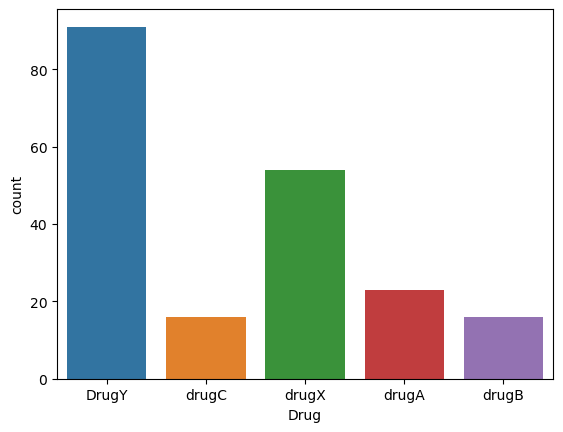

In [287]:
sns.countplot(x = "Drug", data = drug)
plt.show()

**Note:** I note the count difference, DrugY and drugX have a much higher count.

C:\Users\HP\AppData\Local\Temp\ipykernel_8184\1200281810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = drug.corr()


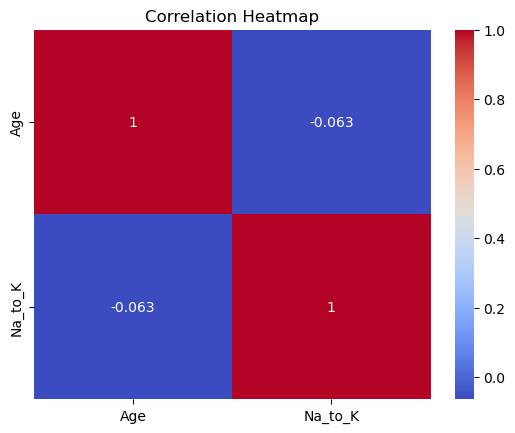

In [288]:
# Correlation heatmap
correlation_matrix = drug.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 

**Note:** Age and Sodium/potassium (Na to K) ratio, have low correlation

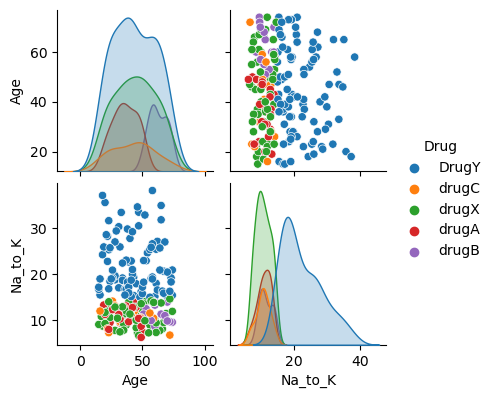

In [289]:
sns.pairplot(drug, hue="Drug", height=2)
plt.show()

**Note:** It's easy to seperate DrugY with Na_to_K and Age, but the other drug types are very much clumped together and harder to seperate.

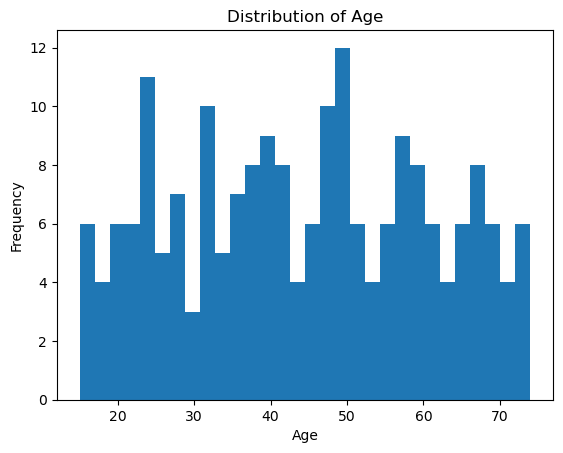

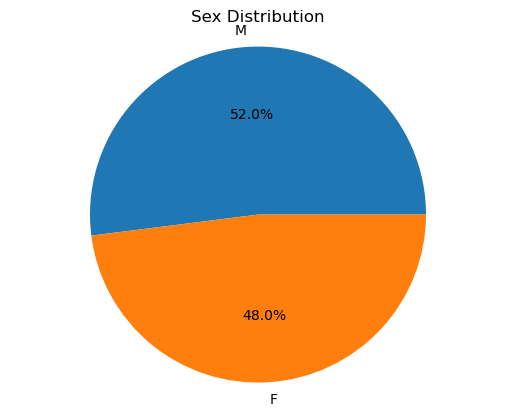

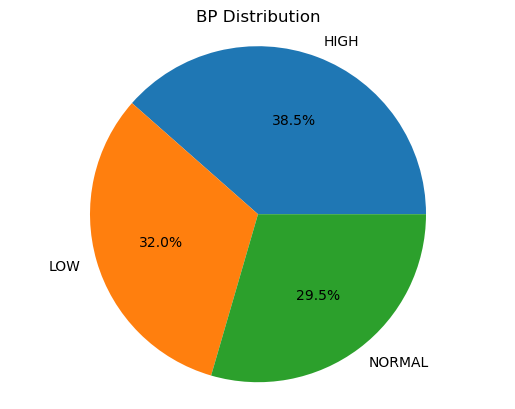

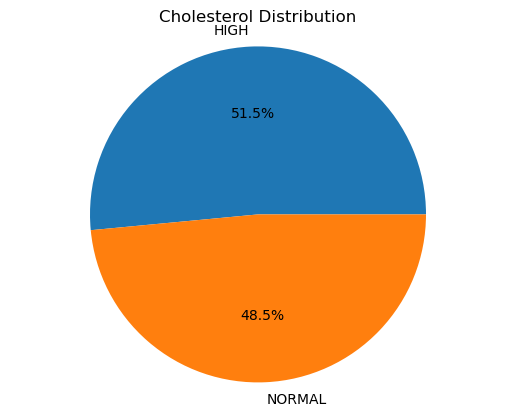

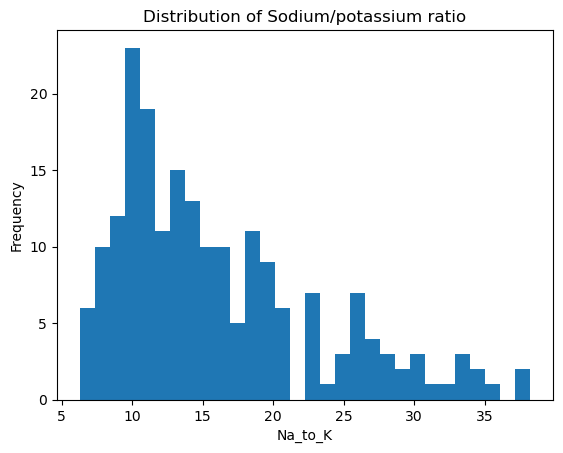

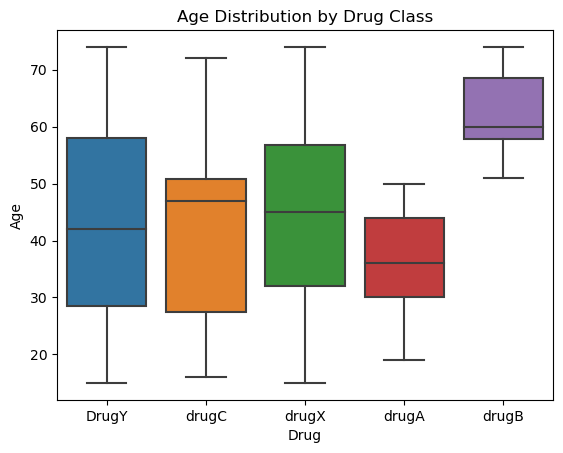

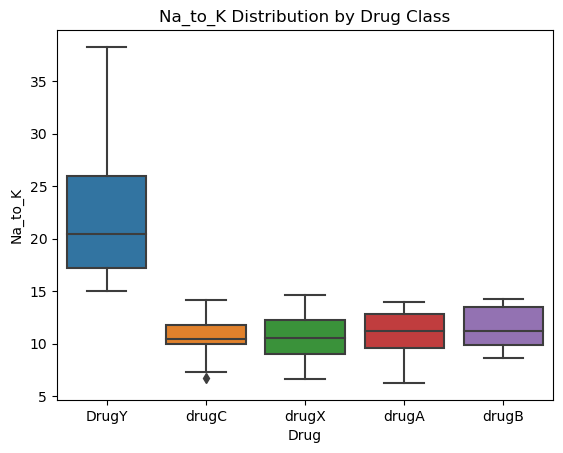

In [290]:
# Histogram of Age
plt.hist(drug['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Sex pie chart
plt.pie(drug['Sex'].value_counts(), labels=drug['Sex'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sex Distribution')
plt.show()


# Sex pie chart
plt.pie(drug['BP'].value_counts(), labels=drug['BP'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('BP Distribution')
plt.show()


# Sex pie chart
plt.pie(drug['Cholesterol'].value_counts(), labels=drug['Cholesterol'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Cholesterol Distribution')
plt.show()


# Histogram of Na_to_K
plt.hist(drug['Na_to_K'], bins=30)
plt.xlabel('Na_to_K')
plt.ylabel('Frequency')
plt.title('Distribution of Sodium/potassium ratio')
plt.show()

# Box plot of Age by Drug Class
sns.boxplot(x='Drug', y='Age', data=drug)
plt.xlabel('Drug')
plt.ylabel('Age')
plt.title('Age Distribution by Drug Class')
plt.show()

# Box plot of Age by Drug Class
sns.boxplot(x='Drug', y='Na_to_K', data=drug)
plt.xlabel('Drug')
plt.ylabel('Na_to_K')
plt.title('Na_to_K Distribution by Drug Class')
plt.show()

#### Data Cleaning
Now I'm going to do some data cleaning, remove missing values, encode categorical features and scale/normalize the data.

In [291]:
# let's inpect the amount of missing values in the data
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Note:** There are no missing values, so i don't need to deal with any.

In [292]:
#Encode categorical variables

# import encoders from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# I used a OrdinalEncoder on the Blood Pressure feature, since it has the categories LOW, NORMAL and HIGH
encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
encoder.fit(drug[['BP']])
encoded_values = encoder.transform(drug[['BP']])
drug['BP'] = encoded_values

# I also used a OrdinalEncoder on the Cholesterol feature, since it has the categories NORMAL and HIGH
encoder = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
encoder.fit(drug[['Cholesterol']])
encoded_values = encoder.transform(drug[['Cholesterol']])
drug['Cholesterol'] = encoded_values

# Then I used a OneHotEncoder the Sex feature, since it has only two categories and therefor don't create tons of new features
encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(drug[['Sex']])
drug['Sex'] = encoded_values

# Then in the end I used a LabelEncoder for the target
label_encoder = LabelEncoder()
drug['Drug'] = label_encoder.fit_transform(drug['Drug'])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [293]:
# Let's take a look at the data after encding
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1.0,2.0,1.0,25.355,0
1,47,0.0,0.0,1.0,13.093,3
2,47,0.0,0.0,1.0,10.114,3
3,28,1.0,1.0,1.0,7.798,4
4,61,1.0,0.0,1.0,18.043,0
...,...,...,...,...,...,...
195,56,1.0,0.0,1.0,11.567,3
196,16,0.0,0.0,1.0,12.006,3
197,52,0.0,1.0,1.0,9.894,4
198,23,0.0,1.0,0.0,14.020,4


In [294]:
X = drug.drop(columns=['Drug'])
y = drug['Drug']

In [295]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1.0,2.0,1.0,25.355
1,47,0.0,0.0,1.0,13.093
2,47,0.0,0.0,1.0,10.114
3,28,1.0,1.0,1.0,7.798
4,61,1.0,0.0,1.0,18.043
...,...,...,...,...,...
195,56,1.0,0.0,1.0,11.567
196,16,0.0,0.0,1.0,12.006
197,52,0.0,1.0,1.0,9.894
198,23,0.0,1.0,0.0,14.020


In [296]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [297]:
# Now let's also normalize the data with sklearns StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [298]:
# Let's take a look at the data after normalizing
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,1.040833,1.116921,0.970437,1.286522
1,0.162699,-0.960769,-1.272214,0.970437,-0.415145
2,0.162699,-0.960769,-1.272214,0.970437,-0.828558
3,-0.988614,1.040833,-0.077647,0.970437,-1.149963
4,1.011034,1.040833,-1.272214,0.970437,0.271794
...,...,...,...,...,...
195,0.708057,1.040833,-1.272214,0.970437,-0.626917
196,-1.715759,-0.960769,-1.272214,0.970437,-0.565995
197,0.465676,-0.960769,-0.077647,0.970437,-0.859089
198,-1.291591,-0.960769,-0.077647,-1.030464,-0.286500


In [299]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

## Feature Engineering and Selection

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf  = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_

In [310]:
importance

array([0.13079442, 0.01171066, 0.24476184, 0.05621565, 0.55651743])

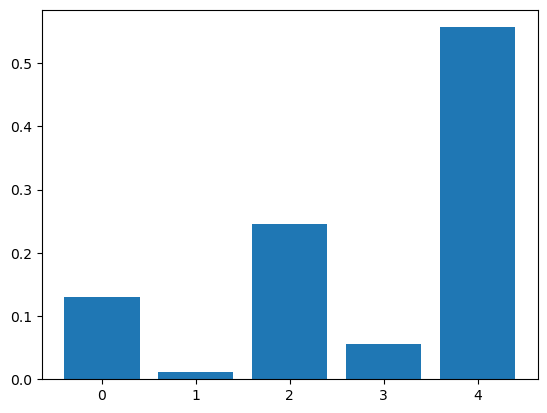

In [311]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [312]:
selector = SelectFromModel(rf, threshold=0.08)
selector.fit(X, y)
X_selected = selector.transform(X)

In [315]:
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)

Index(['Age', 'BP', 'Na_to_K'], dtype='object')


In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

lr = LogisticRegression()
lr.fit(selected_features, y_train)


ValueError: could not convert string to float: 'Age'